# Download and Extraction

In [ ]:
import os
import zipfile

url = 'https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/svx74xcrjr-1.zip'

filename = 'gutenberg_gait_dataset.zip'

os.system(f'wget -O {filename} "{url}"')

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/differential_learning/gutenberg_gait_data')

os.listdir('/content/drive/MyDrive/differential_learning/gutenberg_gait_data')


['Gait_rawdata_c3d.zip',
 'Gait_rawdata_f_1_tsv.zip',
 'gait_subject_info.csv',
 'Gait_rawdata_tsv.zip',
 'Gait_rawdata_f_2_tsv.zip']

In [ ]:
def unzip_to_folder(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

unzip_to_folder('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/Gait_rawdata_tsv.zip', '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_data')
unzip_to_folder('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/Gait_rawdata_f_1_tsv.zip', '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_data')
unzip_to_folder('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/Gait_rawdata_f_2_tsv.zip', '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_data')

len(os.listdir('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_data'))


3753

# Data CSV Conversion

In [ ]:
# Define source and destination directories
tsv_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_data'
cleaned_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_csvs'
os.makedirs(cleaned_dir, exist_ok=True)

# Helper: find the header line
def find_header_line(filepath):
    with open(filepath, 'r') as f:
        for i, line in enumerate(f):
            if "Frame" in line and "Time" in line:
                return i
    return None

converted = 0
skipped = []

# Process each TSV file
for file in os.listdir(tsv_dir):
    if not file.endswith('.tsv') or 'Static' in file:
        continue

    path = os.path.join(tsv_dir, file)
    header_row = find_header_line(path)

    if header_row is None:
        skipped.append((file, 'Header not found'))
        continue

    try:
        df = pd.read_csv(path, sep='\t', skiprows=header_row, engine='python', on_bad_lines='skip')
        out_name = file.replace('.tsv', '.csv')
        out_path = os.path.join(cleaned_dir, out_name)
        df.to_csv(out_path, index=False)
        converted += 1
    except Exception as e:
        skipped.append((file, str(e)))

print(f"✅ Converted: {converted} files saved to `{cleaned_dir}`")
print(f"⚠️ Skipped: {len(skipped)} files")

# Save skipped list for later
pd.DataFrame(skipped, columns=['file', 'reason']).to_csv(os.path.join(cleaned_dir, 'skipped_files.csv'), index=False)


✅ Converted: 1142 files saved to `/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_csvs`
⚠️ Skipped: 2284 files


But why though?

In [ ]:
df_skipped = pd.read_csv('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_csvs/skipped_files.csv')
df_skipped.head(10)

,file,reason
0,S1_0002_Gait_f_1.tsv,Header not found
1,S1_0003_Gait_f_1.tsv,Header not found
2,S1_0004_Gait_f_1.tsv,Header not found
3,S1_0005_Gait_f_1.tsv,Header not found
4,S1_0006_Gait_f_1.tsv,Header not found
5,S1_0007_Gait_f_1.tsv,Header not found
6,S1_0008_Gait_f_1.tsv,Header not found
7,S1_0009_Gait_f_1.tsv,Header not found
8,S1_0010_Gait_f_1.tsv,Header not found
9,S1_0011_Gait_f_1.tsv,Header not found


In [ ]:
def preview_file_lines(filepath, num_lines=30):
    print(f"\n📂 Previewing: {os.path.basename(filepath)}\n{'-'*50}")
    with open(filepath, 'r') as f:
        for i in range(num_lines):
            line = f.readline()
            print(f"{i}: {line.strip()}")

In [ ]:
bad_file = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_data/S1_0002_Gait_f_1.tsv'
preview_file_lines(bad_file)



📂 Previewing: S1_0002_Gait_f_1.tsv
--------------------------------------------------
0: NO_OF_SAMPLES	1320
1: FREQUENCY	1000
2: TIME_STAMP	2016-06-20, 10:24:23	8464.65866444
3: FIRST_SAMPLE	3417
4: DESCRIPTION	--
5: DATA_INCLUDED	Force
6: FORCE_PLATE_TYPE	Kistler
7: FORCE_PLATE_MODEL	9287CA
8: FORCE_PLATE_NAME	vorne 1
9: FORCE_PLATE_CORNER_POSX_POSY_X	881.198975
10: FORCE_PLATE_CORNER_POSX_POSY_Y	581.159973
11: FORCE_PLATE_CORNER_POSX_POSY_Z	-4.928020
12: FORCE_PLATE_CORNER_NEGX_POSY_X	880.101990
13: FORCE_PLATE_CORNER_NEGX_POSY_Y	-2.366100
14: FORCE_PLATE_CORNER_NEGX_POSY_Z	-5.842590
15: FORCE_PLATE_CORNER_NEGX_NEGY_X	-0.813263
16: FORCE_PLATE_CORNER_NEGX_NEGY_Y	-6.946270
17: FORCE_PLATE_CORNER_NEGX_NEGY_Z	-6.117790
18: FORCE_PLATE_CORNER_POSX_NEGY_X	-4.827390
19: FORCE_PLATE_CORNER_POSX_NEGY_Y	578.421021
20: FORCE_PLATE_CORNER_POSX_NEGY_Z	-6.171600
21: FORCE_PLATE_LENGTH	900.000000
22: FORCE_PLATE_WIDTH	600.000000
23: Sample	Time	Force_X	Force_Y	Force_Z	Moment_X	Moment_Y	Moment_Z	C

In [ ]:
marker_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_marker_csvs'
force_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_force_csvs'
os.makedirs(marker_dir, exist_ok=True)
os.makedirs(force_dir, exist_ok=True)

def find_flexible_header_line(filepath):
    with open(filepath, 'r') as f:
        for i, line in enumerate(f):
            if ("Frame" in line or "Sample" in line) and "Time" in line:
                return i
    return None

converted_marker, converted_force = 0, 0
skipped = []

for file in os.listdir(tsv_dir):
    if not file.endswith('.tsv') or 'Static' in file:
        continue

    path = os.path.join(tsv_dir, file)
    header_row = find_flexible_header_line(path)

    if header_row is None:
        skipped.append((file, 'Header not found'))
        continue

    try:
        df = pd.read_csv(path, sep='\t', skiprows=header_row, engine='python', on_bad_lines='skip')

        if 'Frame' in df.columns or any(col.startswith('HEAD') or col.startswith('R HEEL') for col in df.columns):
            out_path = os.path.join(marker_dir, file.replace('.tsv', '.csv'))
            df.to_csv(out_path, index=False)
            converted_marker += 1
        else:
            out_path = os.path.join(force_dir, file.replace('.tsv', '.csv'))
            df.to_csv(out_path, index=False)
            converted_force += 1
    except Exception as e:
        skipped.append((file, str(e)))

print(f"✅ Marker trials saved: {converted_marker}")
print(f"✅ Force-only trials saved: {converted_force}")
print(f"⚠️ Skipped: {len(skipped)} files")

pd.DataFrame(skipped, columns=['file', 'reason']).to_csv('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/skipped_files_v2.csv', index=False)

✅ Marker trials saved: 1142
✅ Force-only trials saved: 2284
⚠️ Skipped: 0 files


# Dataset Exploration

In [ ]:
import pandas as pd

gait_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_data/'
gait_files = sorted([f for f in os.listdir(gait_dir) if f.endswith('.tsv') and 'Static' not in f])

metadata = []

for file in gait_files:
    parts = file.replace('.tsv', '').split('_')
    subject_id = parts[0]
    trial_id = parts[1]

    metadata.append({
        'subject_id': subject_id,
        'trial_id': trial_id,
        'filename': file
    })

df_meta = pd.DataFrame(metadata)
df_meta.to_csv('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_metadata.csv', index=False)
df_meta.head()

,subject_id,trial_id,filename
0,S02,0002,S02_0002_Gait.tsv
1,S02,0002,S02_0002_Gait_f_1.tsv
2,S02,0002,S02_0002_Gait_f_2.tsv
3,S02,0003,S02_0003_Gait.tsv
4,S02,0003,S02_0003_Gait_f_1.tsv


## Trials Per Subject

In [ ]:
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

marker_files = glob.glob('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_marker_csvs/*.csv')
force_files = glob.glob('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_force_csvs/*.csv')

def extract_meta_info(path, typ):
    fname = os.path.basename(path)
    subj = fname.split('_')[0]
    trial = fname.split('_')[1]
    return {'file': path, 'subject_id': subj, 'trial_id': trial, 'type': typ}

meta = [extract_meta_info(f, 'marker') for f in marker_files] + \
       [extract_meta_info(f, 'force') for f in force_files]

df_meta = pd.DataFrame(meta)

<Axes: xlabel='subject_id', ylabel='count'>

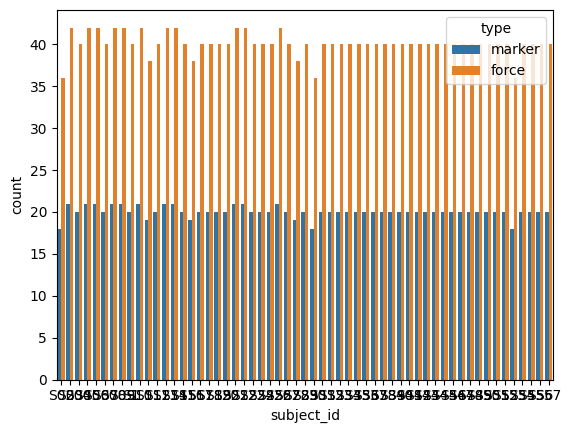

In [ ]:
sns.countplot(x='subject_id', hue='type', data=df_meta, order=sorted(df_meta['subject_id'].unique()))

## Sample GRF Curve

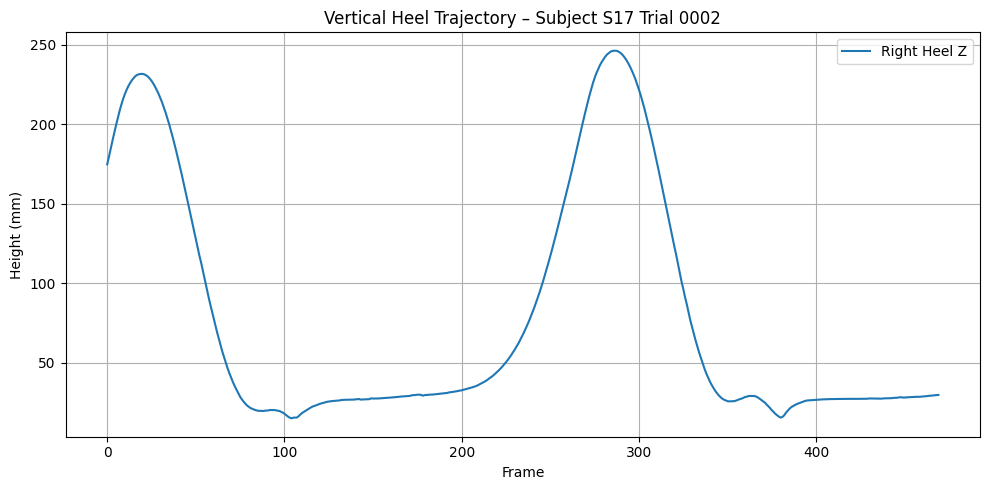

In [ ]:
file_path = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_marker_csvs/S17_0002_Gait.csv'

df = pd.read_csv(file_path)

if 'R HEEL Z' not in df.columns:
    raise ValueError("Column 'R HEEL Z' not found in this trial.")

plt.figure(figsize=(10, 5))
plt.plot(df['R HEEL Z'], label='Right Heel Z', color='tab:blue')
plt.title('Vertical Heel Trajectory – Subject S17 Trial 0002')
plt.xlabel('Frame')
plt.ylabel('Height (mm)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Marker Presence Audit

In [ ]:
from collections import Counter

marker_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_marker_csvs/'
marker_presence = Counter()
files_scanned = 0

for file in os.listdir(marker_dir):
    if not file.endswith('.csv'):
        continue
    path = os.path.join(marker_dir, file)
    try:
        df = pd.read_csv(path)
        for col in df.columns:
            marker_presence[col.strip()] += 1
        files_scanned += 1
    except Exception as e:
        print(f"Failed to read {file}: {e}")
        continue

print(f"Scanned {files_scanned} marker trials.")

df_marker_count = pd.DataFrame.from_dict(marker_presence, orient='index', columns=['count'])
df_marker_count = df_marker_count.sort_values(by='count', ascending=False)
df_marker_count.to_csv('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/marker_presence_counts_marker_only.csv')
df_marker_count.head(20)


Scanned 1142 marker trials.


,count
Frame,1142
Time,1142
HEAD ANT X,1142
HEAD ANT Y,1142
HEAD ANT Z,1142
R HEAD X,1142
R HEAD Y,1142
R HEAD Z,1142
L HEAD X,1142
L HEAD Y,1142


## Force Channel Audit (Force-Only Trials)

In [ ]:
force_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_force_csvs/'
force_presence = Counter()
files_scanned = 0

for file in os.listdir(force_dir):
    if not file.endswith('.csv'):
        continue
    path = os.path.join(force_dir, file)
    try:
        df = pd.read_csv(path)
        for col in df.columns:
            force_presence[col.strip()] += 1
        files_scanned += 1
    except Exception as e:
        print(f"Failed to read {file}: {e}")
        continue

In [ ]:
print(f"Scanned {files_scanned} force-only trials.")

# Save force column counts
df_force_count = pd.DataFrame.from_dict(force_presence, orient='index', columns=['count'])
df_force_count = df_force_count.sort_values(by='count', ascending=False)
df_force_count.to_csv('/content/drive/MyDrive/differential_learning/gutenberg_gait_data/marker_presence_counts_force_only.csv')
df_force_count.head(20)

Scanned 1142 force-only trials.


,count
Sample,2284
Time,2284
Force_X,2284
Force_Y,2284
Force_Z,2284
Moment_X,2284
Moment_Y,2284
Moment_Z,2284
COP_X,2284
COP_Y,2284


## Movement Over Several Trials

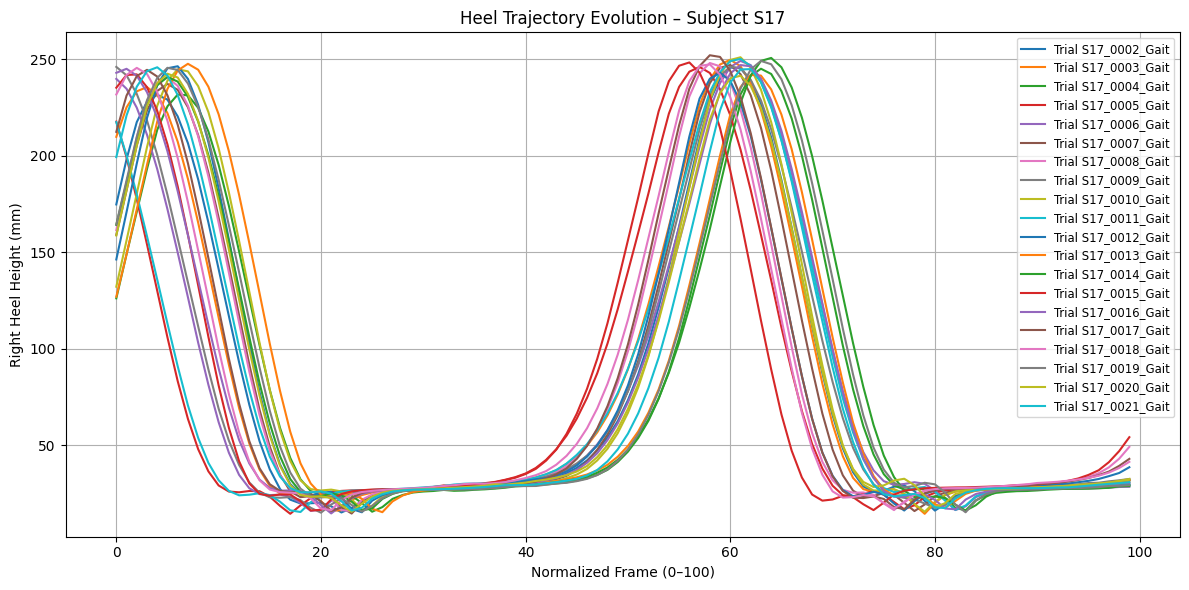

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

subject_id = 'S17'
gait_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_marker_csvs/'

subject_trials = sorted([
    f for f in os.listdir(gait_dir)
    if f.startswith(subject_id) and f.endswith('.csv')
])

def normalize_marker_signal(signal, target_length=100):
    x_original = np.linspace(0, 1, len(signal))
    x_new = np.linspace(0, 1, target_length)
    f = interp1d(x_original, signal, kind='linear')
    return f(x_new)

plt.figure(figsize=(12, 6))

for file in subject_trials[:20]:
    path = os.path.join(gait_dir, file)
    try:
        df = pd.read_csv(path)
    except Exception as e:
        print(f"Failed to parse {file}: {e}")
        continue

    if 'R HEEL Z' not in df.columns:
        print(f"Skipping {file} — missing 'R HEEL Z'")
        continue

    heel_z = normalize_marker_signal(df['R HEEL Z'].values)
    trial_id = file.replace('.csv', '')
    plt.plot(heel_z, label=f'Trial {trial_id}')

plt.title(f'Heel Trajectory Evolution – Subject {subject_id}')
plt.xlabel('Normalized Frame (0–100)')
plt.ylabel('Right Heel Height (mm)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

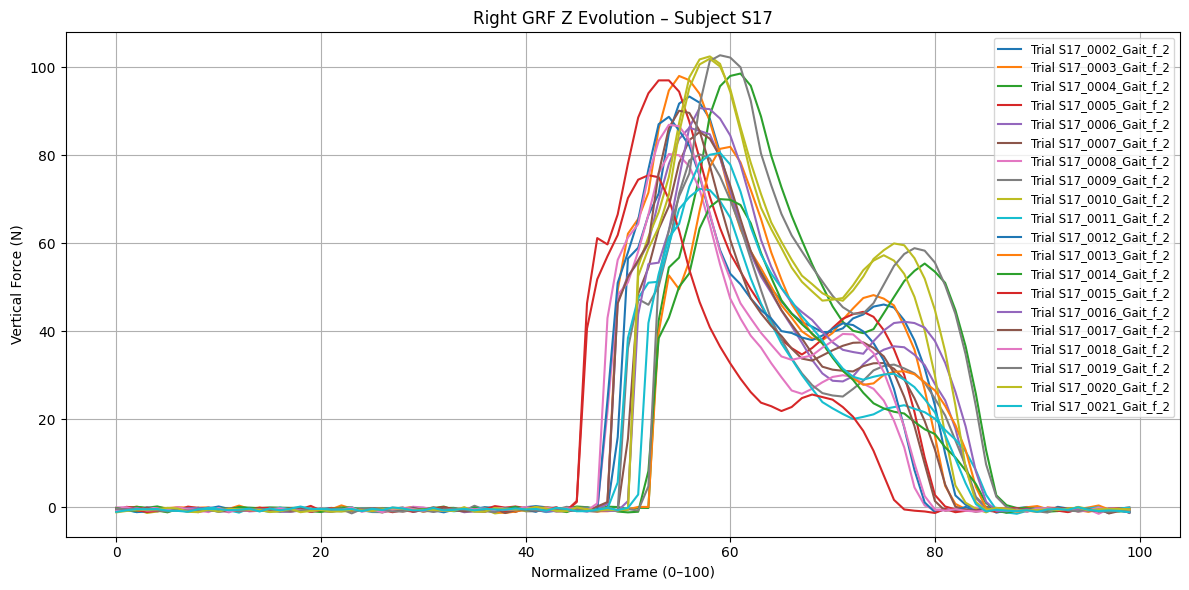

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

subject_id = 'S17'
force_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_force_csvs/'

subject_force_trials = sorted([
    f for f in os.listdir(force_dir)
    if f.startswith(subject_id) and f.endswith('.csv')
])

def normalize_force_signal(signal, target_length=100):
    x_original = np.linspace(0, 1, len(signal))
    x_new = np.linspace(0, 1, target_length)
    f = interp1d(x_original, signal, kind='linear')
    return f(x_new)

plt.figure(figsize=(12, 6))

for file in subject_force_trials[:40]:

    if not file.endswith('_f_2.csv'):
      continue

    path = os.path.join(force_dir, file)
    try:
        df = pd.read_csv(path)
    except Exception as e:
        print(f"Failed to parse {file}: {e}")
        continue

    possible_force_columns = ['Force_Z', 'R GRF Z', 'GRF_Z', 'Fz']
    force_col = next((col for col in df.columns if col.strip().upper() in [x.upper() for x in possible_force_columns]), None)

    if not force_col:
        print(f"Skipping {file} — no vertical GRF column found")
        continue

    grf_z = normalize_force_signal(df[force_col].values)

    if df[force_col].mean() < 0:
      grf_z = -grf_z

    trial_id = file.replace('.csv', '')
    plt.plot(grf_z, label=f'Trial {trial_id}')

plt.title(f'Right GRF Z Evolution – Subject {subject_id}')
plt.xlabel('Normalized Frame (0–100)')
plt.ylabel('Vertical Force (N)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

# Movement Insights Over 20 Trials for Sample Subject

In [ ]:
def normalize_signal(signal, target_length=100):
    x_original = np.linspace(0, 1, len(signal))
    x_new = np.linspace(0, 1, target_length)
    f = interp1d(x_original, signal, kind='linear')
    return f(x_new)

metrics = []

for i in range(2, 22):
    trial_id = f'{subject_id}_{"%04d" % i}_Gait'
    marker_file = os.path.join(marker_dir, f'{trial_id}.csv')
    force_file = os.path.join(force_dir, f'{trial_id}_f_2.csv')

    try:
        df_marker = pd.read_csv(marker_file)
        df_force = pd.read_csv(force_file)
    except:
        continue

    if 'R HEEL Z' not in df_marker.columns:
        continue

    heel_z = normalize_signal(df_marker['R HEEL Z'].values)
    peak_heel = np.max(heel_z)
    time_to_peak_heel = np.argmax(heel_z) / 100

    force_col = next((col for col in df_force.columns if col.strip().upper() in ['FORCE_Z', 'R GRF Z', 'GRF_Z', 'FZ']), None)
    if not force_col:
        continue

    grf_z = normalize_signal(df_force[force_col].values)
    if df_force[force_col].mean() < 0:
        grf_z = -grf_z

    peak_force = np.max(grf_z)
    time_to_peak_force = np.argmax(grf_z) / 100

    metrics.append({
        'Trial': trial_id,
        'Peak Heel Height (mm)': round(peak_heel, 2),
        'Time to Peak Heel': round(time_to_peak_heel, 3),
        'Peak Force (N)': round(peak_force, 2),
        'Time to Peak Force': round(time_to_peak_force, 3),
        'Heel-Force Lag': round(abs(time_to_peak_force - time_to_peak_heel), 3)
    })

df_metrics = pd.DataFrame(metrics).sort_values('Trial')

summary = {
    'Avg Heel Height': df_metrics['Peak Heel Height (mm)'].mean(),
    'Std Heel Height': df_metrics['Peak Heel Height (mm)'].std(),
    'Avg GRF Peak': df_metrics['Peak Force (N)'].mean(),
    'Std GRF Peak': df_metrics['Peak Force (N)'].std(),
    'Avg Heel-Force Lag': df_metrics['Heel-Force Lag'].mean()
}

In [ ]:
df_metrics = pd.DataFrame(metrics).sort_values('Trial')
display(df_metrics)

print("Summary of Observed Evolution:")
print(f"Avg Heel Height: {df_metrics['Peak Heel Height (mm)'].mean():.2f} ± {df_metrics['Peak Heel Height (mm)'].std():.2f} mm")
print(f"Avg Peak Force: {df_metrics['Peak Force (N)'].mean():.2f} ± {df_metrics['Peak Force (N)'].std():.2f} N")
print(f"Avg Heel-Force Lag: {df_metrics['Heel-Force Lag'].mean():.3f}")

,Trial,Peak Heel Height (mm),Time to Peak Heel,Peak Force (N),Time to Peak Force,Heel-Force Lag
0,S17_0002_Gait,245.82,0.60,93.34,0.56,0.04
1,S17_0003_Gait,249.85,0.60,98.01,0.55,0.05
2,S17_0004_Gait,245.20,0.63,98.56,0.61,0.02
3,S17_0005_Gait,246.14,0.57,97.01,0.54,0.03
4,S17_0006_Gait,249.25,0.61,86.24,0.56,0.05
5,S17_0007_Gait,247.15,0.60,85.26,0.57,0.03
6,S17_0008_Gait,248.17,0.58,80.27,0.54,0.04
7,S17_0009_Gait,246.24,0.60,80.18,0.57,0.03
8,S17_0010_Gait,251.14,0.61,102.46,0.58,0.03
9,S17_0011_Gait,250.30,0.61,72.35,0.57,0.04


Summary of Observed Evolution:
Avg Heel Height: 247.87 ± 2.33 mm
Avg Peak Force: 88.13 ± 10.01 N
Avg Heel-Force Lag: 0.135


In [ ]:
peak_heel = df_metrics['Peak Heel Height (mm)'].values
peak_force = df_metrics['Peak Force (N)'].values
heel_force_lag = df_metrics['Heel-Force Lag'].values
trials = df_metrics['Trial'].values

avg_heel = np.mean(peak_heel)
std_heel = np.std(peak_heel)

avg_force = np.mean(peak_force)
std_force = np.std(peak_force)

avg_lag = np.mean(heel_force_lag)
std_lag = np.std(heel_force_lag)

lag_threshold = 0.3  # empirically defined threshold for delayed response
change_points = np.where(heel_force_lag > lag_threshold)[0]

if len(change_points) > 0:
    first_shift = change_points[0]
    shift_trial = trials[first_shift]
    shift_note = f"Coordination between heel lift and ground reaction force began to noticeably diverge starting from **{shift_trial}**, where heel–force lag exceeded {lag_threshold:.2f} s."
else:
    shift_note = "No significant desynchronization between heel lift and ground reaction force was observed across trials."

summary = f"""
### Movement Evolution Summary for {subject_id}

- **Average Peak Heel Height**: {avg_heel:.2f} mm (±{std_heel:.2f})
- **Average Peak Ground Reaction Force**: {avg_force:.2f} N (±{std_force:.2f})
- **Average Heel–Force Lag**: {avg_lag:.3f} s (±{std_lag:.3f})

The subject exhibited a **consistently stable gait pattern** across trials, particularly in heel elevation, with low inter-trial variability. GRF profiles showed greater variability, possibly due to minor pacing or foot placement changes.

{shift_note}
This behavioral shift may indicate **fatigue onset**, **adjustments in gait strategy**, or **variations in attention** in the latter part of the session.
"""

from IPython.display import Markdown
display(Markdown(summary))



### Movement Evolution Summary for S17

- **Average Peak Heel Height**: 247.87 mm (±2.27)
- **Average Peak Ground Reaction Force**: 88.13 N (±9.76)
- **Average Heel–Force Lag**: 0.135 s (±0.194)

The subject exhibited a **consistently stable gait pattern** across trials, particularly in heel elevation, with low inter-trial variability. GRF profiles showed greater variability, possibly due to minor pacing or foot placement changes.

Coordination between heel lift and ground reaction force began to noticeably diverge starting from **S17_0012_Gait**, where heel–force lag exceeded 0.30 s.
This behavioral shift may indicate **fatigue onset**, **adjustments in gait strategy**, or **variations in attention** in the latter part of the session.


# Movement Metrics Extraction for all Subjects

#### 📌 NOTE:
While marker data represents body segment positions over time (in mm), allowing us to compute biomechanical quantities  such as velocity, acceleration, and jerk, force plate data represents external ground reaction forces (in N).

Therefore:
- The *first derivative* of GRF over time represents the **rate of force development (RFD)**.
- The *second derivative* indicates the **rate of RFD change**, often interpreted as a proxy for neuromuscular control or abrupt force transitions.

This distinction is important:
- Marker-based derivatives reflect **body kinematics** (movement).
- Force plate derivatives reflect **force dynamics**, not physical displacement.

Both are valid indicators of motor learning, but must be interpreted within their respective domains.


## Joint Movements Metrics Extraction

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# === Parameters ===
gait_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_marker_csvs/'
target_length = 100

In [ ]:
from scipy.stats import skew, kurtosis

# === Interpolation helper ===
def normalize_signal(signal, target_length=100):
    x_original = np.linspace(0, 1, len(signal))
    x_new = np.linspace(0, 1, target_length)
    f = interp1d(x_original, signal, kind='linear', fill_value="extrapolate")
    return f(x_new)

def compute_jerk(signal):
    acc = np.gradient(signal)
    jerk = np.gradient(acc)
    return np.sqrt(np.mean(jerk**2))

# === Movement metrics ===
def compute_movement_metrics(signal):
    velocity = np.gradient(signal)
    acceleration = np.gradient(velocity)
    jerk = np.gradient(acceleration)

    time_to_peak = np.argmax(signal) / len(signal)  # normalized 0–1

    return {
        'mean_height': np.mean(signal),
        'range': np.ptp(signal),
        'std_dev': np.std(signal),
        'skewness': skew(signal),
        'kurtosis': kurtosis(signal),
        'time_to_peak': time_to_peak,
        'velocity_rms': np.sqrt(np.mean(velocity**2)),
        'acceleration_rms': np.sqrt(np.mean(acceleration**2)),
        'jerk_rms': np.sqrt(np.mean(jerk**2))
    }


In [ ]:
# === Data collection ===
metrics = []

for file in sorted(os.listdir(gait_dir)):
    if not file.endswith('.csv'):
        continue

    subject = file.split('_')[0]
    trial = file.replace('.csv', '')
    path = os.path.join(gait_dir, file)

    try:
        df = pd.read_csv(path)
    except Exception as e:
        print(f"⚠️ Skipping {file}: {e}")
        continue

    # Filter only Z-dimension joint markers (e.g., "R HEEL Z", "L TOE Z", etc.)
    z_joints = [col for col in df.columns if col.strip().endswith('Z')]

    for joint in z_joints:
        try:
            signal = normalize_signal(df[joint].dropna().values, target_length=target_length)
            joint_mean = np.mean(signal)
            joint_std = np.std(signal)
            joint_range = np.max(signal) - np.min(signal)
            jerk_rms = compute_jerk(signal)

            metrics.append({
                'subject': subject,
                'trial': trial,
                'joint': joint,
                **compute_movement_metrics(signal)
            })

        except Exception as e:
            print(f"⚠️ Issue with joint {joint} in {file}: {e}")
            continue

In [ ]:
# === Save dataframe ===
df_all_metrics = pd.DataFrame(metrics)
df_all_metrics.to_csv('/content/drive/MyDrive/differential_learning/gait_jointwise_metrics.csv', index=False)
print("✅ Joint-wise metrics saved to gait_jointwise_metrics.csv")

✅ Joint-wise metrics saved to gait_jointwise_metrics.csv


## Force Plate Metrics Extraction

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from scipy.stats import skew, kurtosis

# === Set force directory ===
force_dir = '/content/drive/MyDrive/differential_learning/gutenberg_gait_data/gait_clean_force_csvs/'

In [ ]:
# === Interpolation helper ===
def normalize_force_signal(signal, target_length=100):
    if len(signal) < 2:
        return np.full(target_length, np.nan)
    x_original = np.linspace(0, 1, len(signal))
    x_new = np.linspace(0, 1, target_length)
    f = interp1d(x_original, signal, kind='linear', fill_value="extrapolate")
    return f(x_new)

# === Compute force metrics ===
def compute_force_metrics(signal):
    velocity = np.gradient(signal)
    acceleration = np.gradient(velocity)
    jerk = np.gradient(acceleration)
    time_to_peak = np.argmax(signal) / len(signal) if len(signal) > 0 else np.nan
    return {
        'mean_force': np.mean(signal),
        'std_dev': np.std(signal),
        'range': np.ptp(signal),
        'skewness': skew(signal),
        'kurtosis': kurtosis(signal),
        'time_to_peak': time_to_peak,
        'velocity_rms': np.sqrt(np.mean(velocity**2)),
        'acceleration_rms': np.sqrt(np.mean(acceleration**2)),
        'jerk_rms': np.sqrt(np.mean(jerk**2))
    }

In [ ]:
# === Scan all force files ===
all_force_files = sorted([f for f in os.listdir(force_dir) if f.endswith('.csv')])
results = []

# === Possible Z columns ===
possible_force_columns = ['Force_Z', 'R GRF Z', 'GRF_Z', 'Fz']

for file in all_force_files:
    try:
        df = pd.read_csv(os.path.join(force_dir, file))
    except Exception as e:
        print(f"❌ Failed to read {file}: {e}")
        continue

    force_col = next((col for col in df.columns if col.strip().upper() in [x.upper() for x in possible_force_columns]), None)
    if not force_col:
        print(f"⚠️ Skipping {file} — no vertical GRF column found")
        continue

    signal = df[force_col].dropna().values
    signal = normalize_force_signal(signal)
    if df[force_col].mean() < 0:
        signal = -signal  # Flip if inverted

    metrics = compute_force_metrics(signal)
    metrics.update({
        'subject': file.split('_')[0],
        'trial': file.replace('.csv', ''),
        'force_column': force_col
    })
    results.append(metrics)

In [ ]:
# === Save results ===
df_force_metrics = pd.DataFrame(results)
df_force_metrics.to_csv('/content/drive/MyDrive/differential_learning/gait_force_metrics.csv', index=False)
print("✅ Force metrics saved!")

✅ Force metrics saved!


In [ ]:
df_force_metrics

,mean_force,std_dev,range,skewness,kurtosis,time_to_peak,velocity_rms,acceleration_rms,jerk_rms,subject,trial,force_column
0,62.548808,74.409774,218.449247,0.650013,-1.164829,0.44,8.858321,2.715435,1.641122,S01,S01_0002_Gait_f_1,Force_Z
1,13.900952,31.120518,129.420827,0.875463,-0.045381,0.84,4.730488,2.378627,1.957071,S01,S01_0002_Gait_f_2,Force_Z
2,45.854008,55.370679,156.796816,0.675158,-1.219575,0.43,6.178296,1.716017,0.894945,S01,S01_0003_Gait_f_1,Force_Z
3,13.684933,29.891575,104.514043,1.963061,2.209504,0.54,5.627697,3.021859,2.489026,S01,S01_0003_Gait_f_2,Force_Z
4,31.603095,42.614509,142.650866,1.022219,-0.383912,0.41,4.969564,1.498465,0.850584,S01,S01_0004_Gait_f_1,Force_Z
...,...,...,...,...,...,...,...,...,...,...,...,...
2279,24.257497,33.028526,111.991686,1.211284,0.424064,0.54,5.119593,2.558979,2.135369,S57,S57_0019_Gait_f_2,Force_Z
2280,21.362337,32.867606,111.531852,1.495885,0.958246,0.42,4.338512,1.251331,0.711625,S57,S57_0020_Gait_f_1,Force_Z
2281,16.114927,25.069541,85.330173,1.508895,0.962558,0.55,3.884248,2.049225,1.734314,S57,S57_0020_Gait_f_2,Force_Z
2282,22.973871,32.133585,102.248193,1.181613,0.068599,0.40,3.920102,1.144464,0.652665,S57,S57_0021_Gait_f_1,Force_Z


## Metrics Merging

In [ ]:
import pandas as pd

# Load CSVs
joint_df = pd.read_csv('/content/drive/MyDrive/differential_learning/gait_jointwise_metrics.csv')
force_df = pd.read_csv('/content/drive/MyDrive/differential_learning/gait_force_metrics.csv')

In [ ]:
# Create unique trial identifier
joint_df['trial_uid'] = joint_df['subject'] + '_' + joint_df['trial']
force_df['trial_uid'] = force_df['subject'] + '_' + force_df['trial']

# Clean force_df trial names to remove '_f_2' and filter only f_2 trials
force_df = force_df[force_df['trial'].str.endswith('_f_2')].copy()
force_df['trial'] = force_df['trial'].str.replace('_f_2', '', regex=False)

# Create unique trial identifier
joint_df['trial_uid'] = joint_df['subject'] + '_' + joint_df['trial']
force_df['trial_uid'] = force_df['subject'] + '_' + force_df['trial']

# Pivot joint data
pivot_df = joint_df.pivot_table(
    index='trial_uid',
    columns='joint',
    values=['mean_height', 'range', 'std_dev', 'velocity_rms', 'acceleration_rms', 'jerk_rms',
            'skewness', 'kurtosis', 'time_to_peak']
)

# Flatten multi-index columns
pivot_df.columns = [f'{metric}_{joint}' for metric, joint in pivot_df.columns]
pivot_df.reset_index(inplace=True)

In [ ]:
# Merge with force metrics
merged_df = pd.merge(pivot_df, force_df.drop(columns=['subject', 'trial']), on='trial_uid', how='left')

# Extract subject and trial info
merged_df[['subject', 'trial']] = merged_df['trial_uid'].str.split('_', n=1, expand=True)

# Reorder columns for clarity
cols = ['subject', 'trial'] + [col for col in merged_df.columns if col not in ['subject', 'trial', 'trial_uid']]
merged_df = merged_df[cols]

In [ ]:
merged_df

,subject,trial,acceleration_rms_C7 Z,acceleration_rms_HEAD ANT Z,acceleration_rms_L ACROMION Z,acceleration_rms_L BACK Z,acceleration_rms_L ELBOW LAT Z,acceleration_rms_L ELBOW MED Z,acceleration_rms_L FOOT LAT Z,acceleration_rms_L FOOT MED Z,...,mean_force,std_dev,range,skewness,kurtosis,time_to_peak,velocity_rms,acceleration_rms,jerk_rms,force_column
0,S01,S01_0002_Gait,0.447926,0.401833,0.421088,0.403321,0.418158,0.476067,1.357578,1.404051,...,13.900952,31.120518,129.420827,0.875463,-0.045381,0.84,4.730488,2.378627,1.957071,Force_Z
1,S01,S01_0003_Gait,0.410780,0.368904,0.387242,0.388864,0.405669,0.446333,1.357561,1.312531,...,13.684933,29.891575,104.514043,1.963061,2.209504,0.54,5.627697,3.021859,2.489026,Force_Z
2,S01,S01_0004_Gait,0.452565,0.392519,0.399557,0.403559,0.443693,0.461446,1.338725,1.277282,...,22.088410,34.713107,125.017943,1.632017,1.413703,0.52,6.952784,4.413294,3.802364,Force_Z
3,S01,S01_0005_Gait,0.449775,0.414457,0.437710,0.414019,0.463713,0.526340,1.458396,1.367815,...,4.094964,26.812549,104.544919,1.600391,1.620548,0.52,5.114049,2.816036,2.336906,Force_Z
4,S01,S01_0006_Gait,0.428812,0.388938,0.402477,0.382773,0.468494,0.458988,1.345365,1.293830,...,8.744351,27.795629,114.940507,-0.022029,-0.127433,0.86,4.372904,2.008562,1.560971,Force_Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,S57,S57_0017_Gait,0.440790,0.393806,0.413247,0.422778,0.439397,0.504835,1.565879,1.310823,...,21.622397,29.898459,99.967599,1.211855,0.337767,0.53,4.947234,2.823557,2.438533,Force_Z
1138,S57,S57_0018_Gait,0.422354,0.376359,0.370404,0.390812,0.382570,0.460975,1.570016,1.299566,...,13.389951,22.689911,79.673115,1.663138,1.368293,0.54,4.052028,2.449226,2.136019,Force_Z
1139,S57,S57_0019_Gait,0.429144,0.380136,0.404361,0.424920,0.422565,0.492096,1.420657,1.204539,...,24.257497,33.028526,111.991686,1.211284,0.424064,0.54,5.119593,2.558979,2.135369,Force_Z
1140,S57,S57_0020_Gait,0.428881,0.395974,0.401292,0.410197,0.415193,0.470436,1.614317,1.313060,...,16.114927,25.069541,85.330173,1.508895,0.962558,0.55,3.884248,2.049225,1.734314,Force_Z


In [ ]:
# Save merged dataset
merged_df.to_csv('/content/drive/MyDrive/differential_learning/gait_merged_dataset.csv', index=False)

# Merged Metrics Exploration (Statistical)

## Overall descriptive stats

In [ ]:
summary_stats = merged_df.describe().transpose()
summary_stats[['mean', 'std', 'min', 'max']]

,mean,std,min,max
acceleration_rms_C7 Z,0.538167,0.132018,0.301730,0.960860
acceleration_rms_HEAD ANT Z,0.517977,0.128201,0.309788,0.956768
acceleration_rms_L ACROMION Z,0.543893,0.146743,0.290937,1.093748
acceleration_rms_L BACK Z,0.550018,0.134833,0.275692,1.045189
acceleration_rms_L ELBOW LAT Z,0.885853,5.961838,0.214063,112.294016
...,...,...,...,...
kurtosis,1.223229,1.358708,-1.268159,7.574115
time_to_peak,0.590657,0.112182,0.420000,0.870000
velocity_rms,5.366161,1.773316,2.390191,13.924049
acceleration_rms,3.020948,1.104349,1.042589,8.225644


## Missing data heatmap

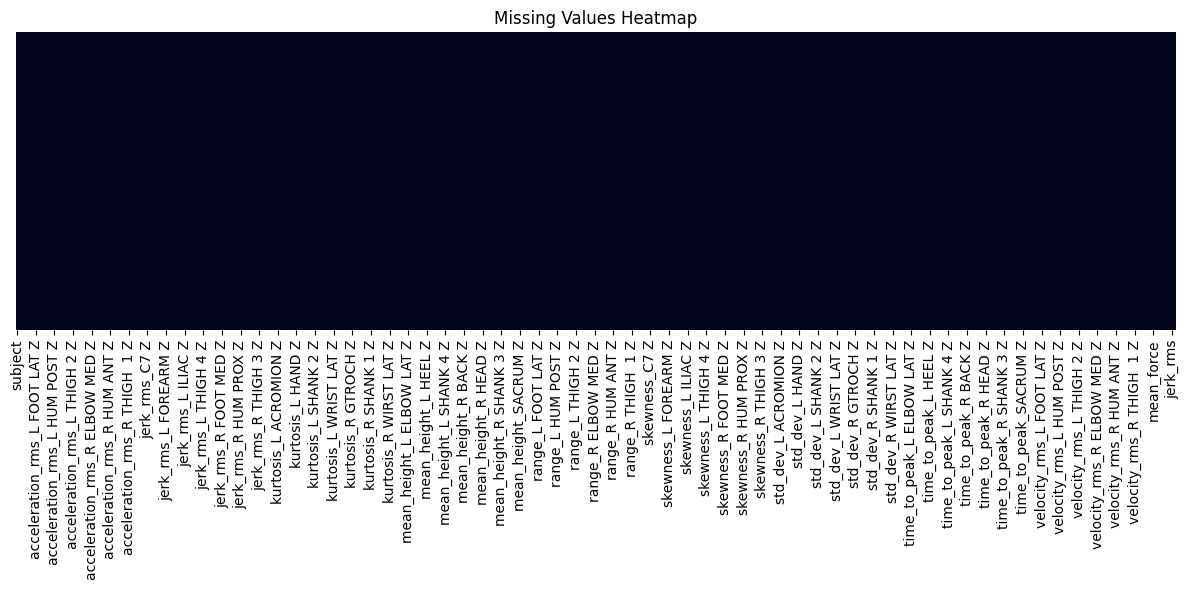

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(merged_df.isnull(), cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

## Distribution of key metrics per joint


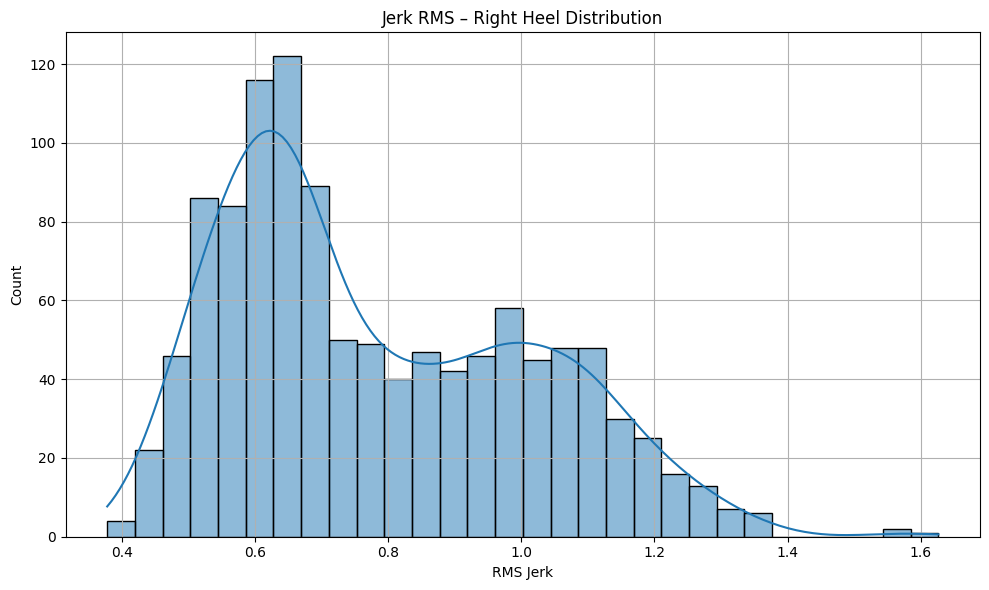

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='jerk_rms_R HEEL Z', kde=True, bins=30)
plt.title('Jerk RMS – Right Heel Distribution')
plt.xlabel('RMS Jerk')
plt.grid(True)
plt.tight_layout()
plt.show()

## Boxplot of force metrics by subject

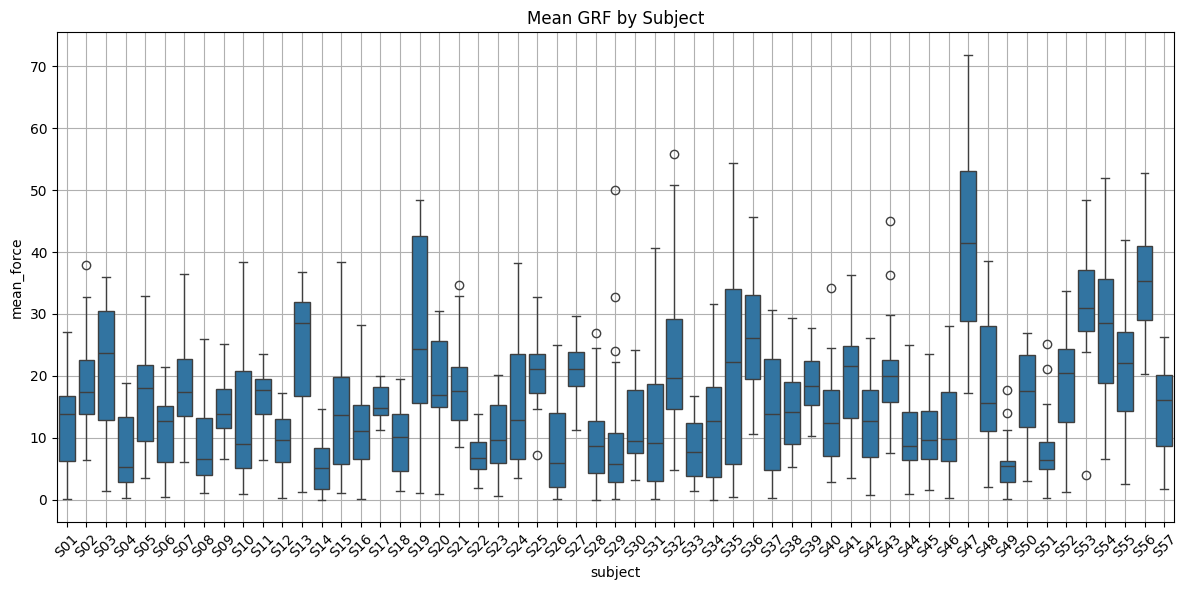

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='subject', y='mean_force')
plt.title('Mean GRF by Subject')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Joint heatmap of movement metrics

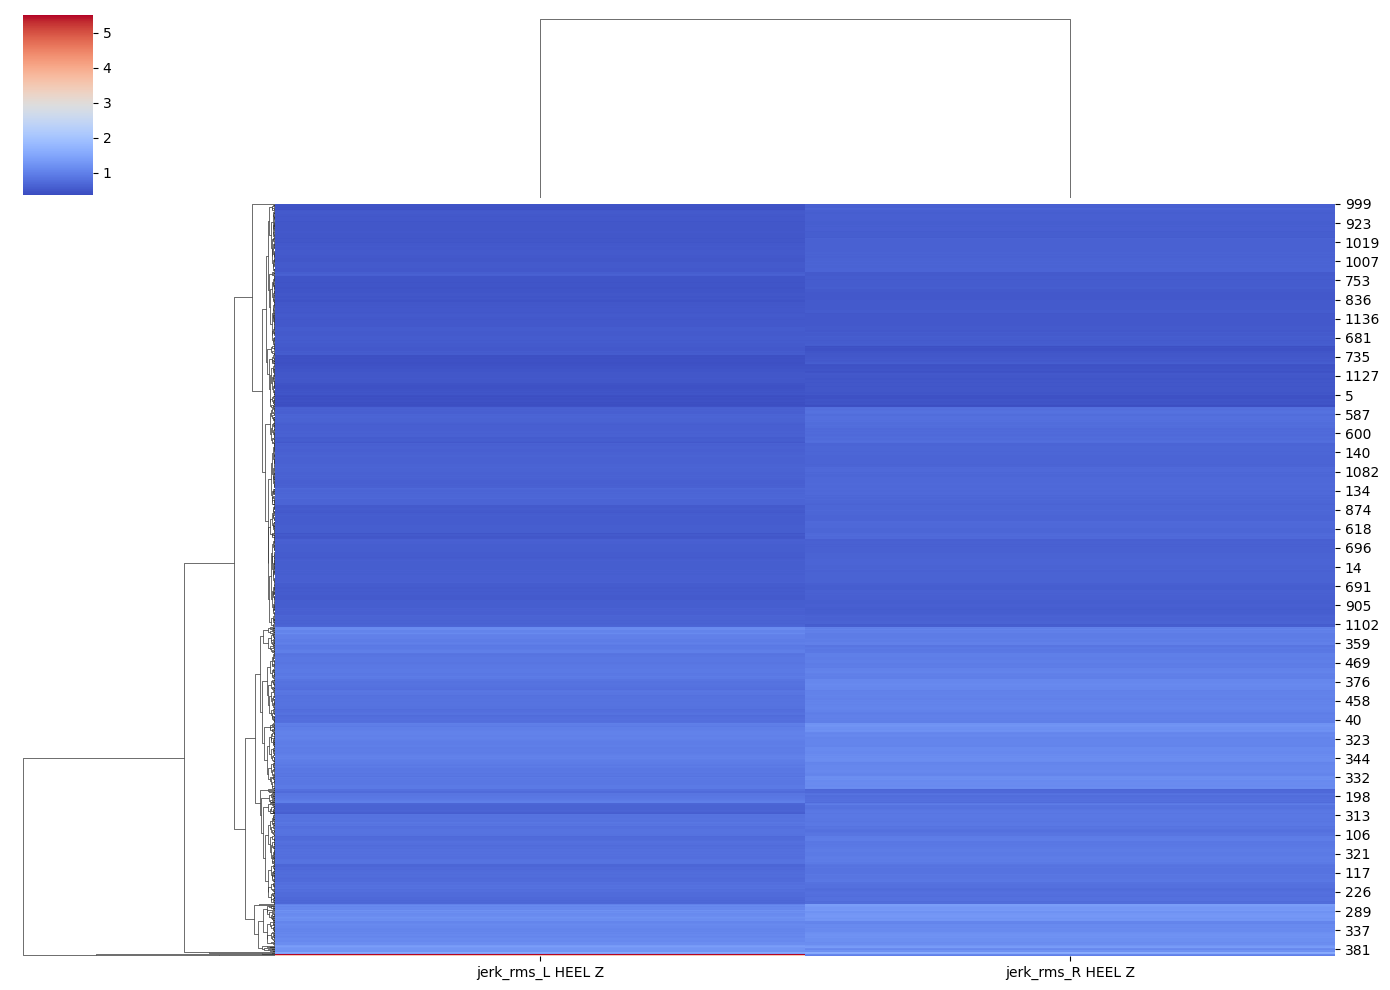

In [ ]:
joint_only_cols = [col for col in merged_df.columns if any(j in col for j in ['ANKLE', 'HEEL', 'KNEE', 'HIP']) and 'jerk' in col]

sns.clustermap(merged_df[joint_only_cols].fillna(0), metric='euclidean', cmap='coolwarm', figsize=(14,10))

## Evolution over trials for a subject

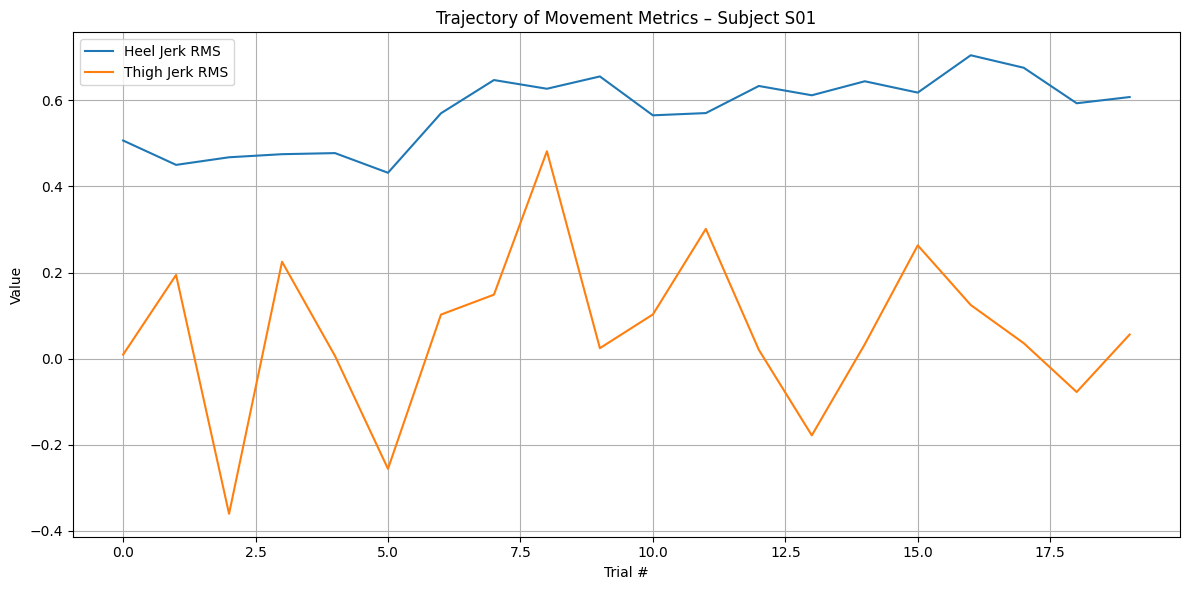

In [ ]:
sub_df = merged_df[merged_df['subject'] == 'S01'].sort_values(by='trial')
plt.figure(figsize=(12,6))
plt.plot(sub_df['jerk_rms_R HEEL Z'].values, label='Heel Jerk RMS')
plt.plot(sub_df['kurtosis_R THIGH 3 Z'].values, label='Thigh Jerk RMS')
plt.title("Trajectory of Movement Metrics – Subject S01")
plt.xlabel("Trial #")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()